In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA




In [45]:
df = pd.read_csv("../final_df.csv")   

df.head()



,CustomerID,purchase_flag,morning,afternoon,evening,night,is_weekend,StockCode,Country,Recency,Frequency,Monetary
0,12346.0,0,1.000000,0.000000,0.000000,0.0,0.000000,411.195599,20.861862,1.648698,-1.188394,3.124567
1,12347.0,1,0.252747,0.747253,0.000000,0.0,0.000000,21.792060,23.681319,-1.811238,1.225580,1.379011
2,12348.0,1,0.354839,0.096774,0.548387,0.0,0.096774,24.018406,32.913985,0.277955,0.771619,0.755331
3,12349.0,1,1.000000,0.000000,0.000000,0.0,0.000000,26.878190,23.064960,-0.686657,-1.188394,0.738768
4,12350.0,1,0.000000,1.000000,0.000000,0.0,0.000000,18.246066,33.767918,1.594997,-1.188394,-0.587242


In [46]:
# Select relevant RFM and behavioral features for clustering

df_original = df.copy()

feature_cols = [
    "Recency",
    "Frequency",
    "Monetary",
    "morning",
    "afternoon",
    "evening",
    "night",
    "is_weekend",
    "StockCode",
    "Country",
]

X = df[feature_cols]

X.head()


,Recency,Frequency,Monetary,morning,afternoon,evening,night,is_weekend,StockCode,Country
0,1.648698,-1.188394,3.124567,1.000000,0.000000,0.000000,0.0,0.000000,411.195599,20.861862
1,-1.811238,1.225580,1.379011,0.252747,0.747253,0.000000,0.0,0.000000,21.792060,23.681319
2,0.277955,0.771619,0.755331,0.354839,0.096774,0.548387,0.0,0.096774,24.018406,32.913985
3,-0.686657,-1.188394,0.738768,1.000000,0.000000,0.000000,0.0,0.000000,26.878190,23.064960
4,1.594997,-1.188394,-0.587242,0.000000,1.000000,0.000000,0.0,0.000000,18.246066,33.767918


In [47]:
# Standardize features using StandardScaler before clustering

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]  

array([[ 1.64869775, -1.18839394,  3.12456679,  1.79952555, -1.74038216,
        -0.16320614,  0.        , -0.4723229 ,  3.45349944, -0.1418077 ],
       [-1.81123752,  1.22558043,  1.37901087, -0.21460153,  0.255417  ,
        -0.16320614,  0.        , -0.4723229 , -0.03955763,  0.20315451],
       [ 0.27795474,  0.77161937,  0.75533085,  0.06057333, -1.48191291,
         5.42601396,  0.        , -0.12613866, -0.0195867 ,  1.33277668],
       [-0.68665744, -1.18839394,  0.73876797,  1.79952555, -1.74038216,
        -0.16320614,  0.        , -0.4723229 ,  0.00606636,  0.12774273],
       [ 1.59499727, -1.18839394, -0.58724176, -0.89585039,  0.93046672,
        -0.16320614,  0.        , -0.4723229 , -0.07136618,  1.43725581]])

In [48]:
# Standardize features using StandardScaler before clustering

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df.head()


,PC1,PC2
0,0.886583,-2.737253
1,2.417818,0.737296
2,1.007139,-1.367553
3,0.527780,-2.462382
4,-2.032024,0.691753


In [49]:
# Apply KMeans clustering with k=8 and compute evaluation metrics

k = 8  
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

df["kmeans_cluster"] = kmeans_labels

sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
db_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)

print(f"Silhouette (KMeans): {sil_kmeans:.3f}")
print(f"Davies-Bouldin (KMeans): {db_kmeans:.3f}")


Silhouette (KMeans): 0.299
Davies-Bouldin (KMeans): 0.892


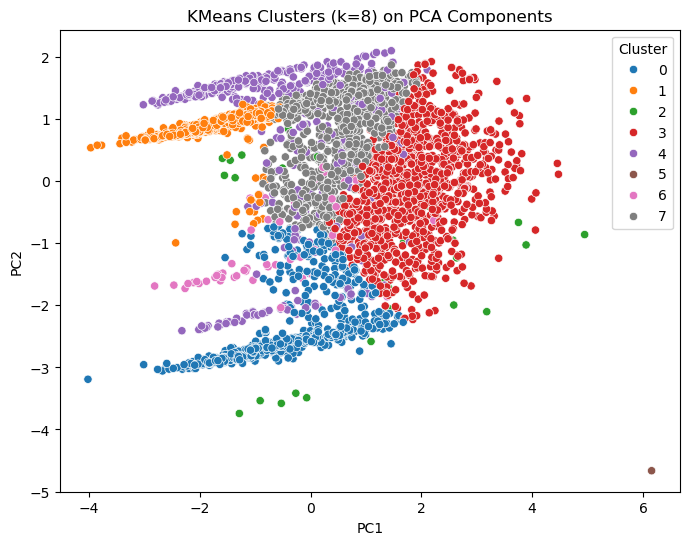

In [50]:
# Visualize KMeans clusters using the 2D PCA projection

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_df["PC1"],
    y=pca_df["PC2"],
    hue=df["kmeans_cluster"],
    palette="tab10",
)
plt.title("KMeans Clusters (k=8) on PCA Components")
plt.legend(title="Cluster")
plt.show()


In [51]:
# Apply Gaussian Mixture Model (GMM) clustering with k=8 and compute evaluation metrics

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=k, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

df["gmm_cluster"] = gmm_labels

sil_gmm = silhouette_score(X_scaled, gmm_labels)
db_gmm = davies_bouldin_score(X_scaled, gmm_labels)

print(f"Silhouette (GMM): {sil_gmm:.3f}")
print(f"Davies-Bouldin (GMM): {db_gmm:.3f}")


Silhouette (GMM): 0.197
Davies-Bouldin (GMM): 1.714


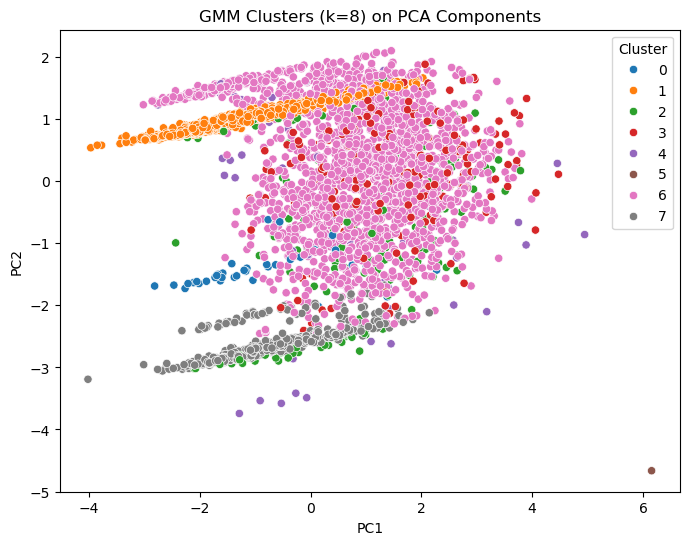

In [52]:
# Visualize GMM clusters using the 2D PCA projection

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_df["PC1"],
    y=pca_df["PC2"],
    hue=df["gmm_cluster"],
    palette="tab10"
)
plt.title("GMM Clusters (k=8) on PCA Components")
plt.legend(title="Cluster")
plt.show()


In [53]:
# Business metrics validation for KMeans clusters
# - customers count
# - average recency, frequency, monetary value
# - conversion rate (purchase_flag)

cluster_summary_kmeans = (
    df.groupby("kmeans_cluster")
    .agg(
        customers=("CustomerID", "nunique"),
        avg_recency=("Recency", "mean"),
        avg_frequency=("Frequency", "mean"),
        avg_monetary=("Monetary", "mean"),
        conversion_rate=("purchase_flag", "mean")
    )
    .sort_values("avg_monetary", ascending=False)
)

cluster_summary_kmeans


,customers,avg_recency,avg_frequency,avg_monetary,conversion_rate
kmeans_cluster,,,,,
5,1,-2.073879,-0.051452,3.524811,1.000000
3,1044,-0.918246,1.145340,1.085087,1.000000
2,35,0.135014,0.122327,0.487392,1.000000
7,1029,-0.194223,0.443569,0.249468,0.999028
4,424,0.222664,-0.339600,-0.402915,0.997642
6,55,0.344108,-0.292109,-0.488111,0.981818
0,786,0.528437,-0.632218,-0.502513,0.966921
1,964,0.650587,-1.036741,-0.847987,0.956432


In [54]:
df.to_csv("../customers_with_segments.csv", index=False)
print("Saved customers_with_segments.csv")


Saved customers_with_segments.csv


## Customer Personas – KMeans Clustering (k=8)

Below are the personas generated from KMeans clustering using RFM and behavioral features.

---

###  **Cluster 5 – Ultra VIP Single Customer**
- **Customers:** 1  
- **Recency:** Excellent (recent purchases)  
- **Frequency:** Neutral  
- **Monetary:**  **Highest of all clusters**  
- **Persona:**  
  **Ultra VIP Big Spender** – A unique, extremely valuable customer with very high spending.  
  Requires personalized attention and exclusive offers.

---

###  **Cluster 3 – High Value Loyal Customers**
- **Customers:** 1044  
- **Recency:** Very good  
- **Frequency:** **Highest frequency**  
- **Monetary:**  **High spending**  
- **Persona:**  
  **Loyal Frequent Buyers** – Highly engaged and very profitable.  
  Ideal for loyalty programs, premium bundles, cross-selling.

---

### **Cluster 2 – Medium Value Regular Customers**
- **Customers:** 35  
- **Recency:** Moderate  
- **Frequency:** Moderate (regular purchases)  
- **Monetary:** Medium  
- **Persona:**  
  **Moderate Buyers** – Steady purchasing pattern, room to grow with targeted promotions.

---

###  **Cluster 7 – Mid-Loyal Customers**
- **Customers:** 1029  
- **Recency:** Good  
- **Frequency:** Above average  
- **Monetary:** Medium low  
- **Persona:**  
  **Engaged Buyers** – Good engagement and purchase patterns.  
  Can be upgraded to “High Value” with personalized recommendations.

---

###  **Cluster 4 – At-Risk Customers**
- **Customers:** 424  
- **Recency:** Getting worse  
- **Frequency:** Low  
- **Monetary:** Low  
- **Persona:**  
  **At-Risk Customers** – Engagement is dropping.  
  Require win-back campaigns and targeted discounts.

---

###  **Cluster 6 – Low Value Occasional Buyers**
- **Customers:** 55  
- **Recency:** Weak  
- **Frequency:** Low  
- **Monetary:** Low  
- **Persona:**  
  **Occasional Buyers** – Rarely purchase and spend little.  
  Good candidates for seasonal or event-based campaigns.

---

###  **Cluster 0 – Low Engagement Customers**
- **Customers:** 786  
- **Recency:** Poor  
- **Frequency:** Very low  
- **Monetary:** Very low  
- **Persona:**  
  **Low Engagement Customers** – Almost inactive, limited spending.  
  Consider automated messaging or low-cost marketing.

---

###  **Cluster 1 – Lost / Dormant Customers**
- **Customers:** 964  
- **Recency:**  Worst (long time since last purchase)  
- **Frequency:** Very low  
- **Monetary:**  Lowest  
- **Persona:**  
  **Lost Customers** – Highly inactive, require re-activation strategies.  
  E.g., “We miss you” campaigns, large discounts, new product introductions.
